In [1]:
import pandas as pd

# Crime ML by <Anette> Leslie PyhonAi ITHS 2024

Some INFO about my ML:

1. I will use a lot of print for functions and command's, just to understand everything I do and what kind of data I get
2. The tools i will use for this ML are sckit-learn, numpy and mathplotlib.
3. The Model I will Train is a logistic regression model, because that feels more easy  for a beginner.


*What do i want to Accomplish:*

Can we predict in which city special crime will increase and therefore take more measures like increasing the police force, cameras and so on to stop crime in this area!


*My Problem with my data:*

I downloaded statistics from BRÅ (https://statistik.bra.se/solwebb/action/index ).
Picked some data I wanted to focus on, like in different counties in Stockholm and the crimes of violence against people.




Here is a example how the data looks:

Region;Brott;�r;Period;Antal;/100 000 inv
Stockholm kommun;Brott mot brottsbalken;2022;Jan;11322;1153;
Stockholm kommun;Brott mot brottsbalken;2022;Feb;12199;1243;

I have a few problems I need to solve with this data, here is a list of those problems:

1. This data uses Swedish letters, another type of unicode
2. I will work more to a regression problem, because the data i use will be more a prediction on a linear scale.
3. Which data is most important to USE for predicting the outcome?
4. Have 4 files with different year, how to put these together without copy paste
5. I need to label the data so its readable for the ML
6. Need to create a lag Feature because working with year and months

*Conclusion*

Below i will work with my data and try to solve the problems that i have with it.

In [2]:

import functools
import glob

# Preparing data
data = pd.concat(map(functools.partial(pd.read_csv, encoding="ISO-8859-1", sep=";", index_col=False ), glob.glob("../data/datasheets/*.txt")))
data.drop(columns=['/100 000 inv'], axis=1, inplace=True)

data

,Region,Brott,År,Period,Antal
0,Botkyrka kommun,3-7 kap. Brott mot person,2021,Jan,241
1,Botkyrka kommun,3-7 kap. Brott mot person,2021,Feb,238
2,Botkyrka kommun,3-7 kap. Brott mot person,2021,Mar,196
3,Botkyrka kommun,3-7 kap. Brott mot person,2021,Apr,242
4,Botkyrka kommun,3-7 kap. Brott mot person,2021,Maj,254
...,...,...,...,...,...
5539,Österåker kommun,7 kap. Brott mot familj,2023 prel.,Aug,0
5540,Österåker kommun,7 kap. Brott mot familj,2023 prel.,Sep,0
5541,Österåker kommun,7 kap. Brott mot familj,2023 prel.,Okt,0
5542,Österåker kommun,7 kap. Brott mot familj,2023 prel.,Nov,0


In [3]:

# Strip leading and trailing whitespaces from all string columns
df = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Remove duplicates based on the content of all columns
cleaned_df = df.drop_duplicates()

data.to_csv('../data/crimedatatest.csv', sep=",", index=False)

/var/folders/7f/gf43ccnj4wl4xnfz4m5xdln00000gn/T/ipykernel_56939/2006806455.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [4]:
# Strip leading and trailing whitespaces from all columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Remove duplicates and keep the first occurrence
cleaned_df = df.drop_duplicates()

# Save the cleaned DataFrame back to a file
cleaned_df.to_csv('cleaned_data.csv', index=False)

/var/folders/7f/gf43ccnj4wl4xnfz4m5xdln00000gn/T/ipykernel_56939/2207920258.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [8]:

data = pd.read_csv('cleaned_data.csv' )
data

,Region,Brott,År,Period,Antal
0,Botkyrka kommun,3-7 kap. Brott mot person,2021,Jan,241
1,Botkyrka kommun,3-7 kap. Brott mot person,2021,Feb,238
2,Botkyrka kommun,3-7 kap. Brott mot person,2021,Mar,196
3,Botkyrka kommun,3-7 kap. Brott mot person,2021,Apr,242
4,Botkyrka kommun,3-7 kap. Brott mot person,2021,Maj,254
...,...,...,...,...,...
11083,Österåker kommun,7 kap. Brott mot familj,2023 prel.,Aug,0
11084,Österåker kommun,7 kap. Brott mot familj,2023 prel.,Sep,0
11085,Österåker kommun,7 kap. Brott mot familj,2023 prel.,Okt,0
11086,Österåker kommun,7 kap. Brott mot familj,2023 prel.,Nov,0


In [9]:
# Define a mapping of Swedish month names to English month names
swedish_to_english_month = {
    'Jan': 'Jan',
    'Feb': 'Feb',
    'Mar': 'Mar',
    'Apr': 'Apr',
    'Maj': 'May', 
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Aug': 'Aug',
    'Sep': 'Sep',
    'Okt': 'Oct',
    'Nov': 'Nov',
    'Dec': 'Dec',

}

# Redo Month namne to month numbers
data['Month'] = data['Period'].apply(lambda x: swedish_to_english_month[x])
#data['Month'] = pd.to_datetime(data['Month'], format='%b').dt.month
data.drop(columns=['Period'], axis=1, inplace=True)
data


,Region,Brott,År,Antal,Month
0,Botkyrka kommun,3-7 kap. Brott mot person,2021,241,Jan
1,Botkyrka kommun,3-7 kap. Brott mot person,2021,238,Feb
2,Botkyrka kommun,3-7 kap. Brott mot person,2021,196,Mar
3,Botkyrka kommun,3-7 kap. Brott mot person,2021,242,Apr
4,Botkyrka kommun,3-7 kap. Brott mot person,2021,254,May
...,...,...,...,...,...
11083,Österåker kommun,7 kap. Brott mot familj,2023 prel.,0,Aug
11084,Österåker kommun,7 kap. Brott mot familj,2023 prel.,0,Sep
11085,Österåker kommun,7 kap. Brott mot familj,2023 prel.,0,Oct
11086,Österåker kommun,7 kap. Brott mot familj,2023 prel.,0,Nov


In [10]:
# Fix 2023 prel. to only 2023

old = {'2023 prel.': '2023'}

data.replace(old, regex=True, inplace=True)
data['Year'] = data['År'].astype(int)
data.drop(columns=['År'], axis=1, inplace=True)

print(data)

                 Region                      Brott  Antal Month  Year
0       Botkyrka kommun  3-7 kap. Brott mot person    241   Jan  2021
1       Botkyrka kommun  3-7 kap. Brott mot person    238   Feb  2021
2       Botkyrka kommun  3-7 kap. Brott mot person    196   Mar  2021
3       Botkyrka kommun  3-7 kap. Brott mot person    242   Apr  2021
4       Botkyrka kommun  3-7 kap. Brott mot person    254   May  2021
...                 ...                        ...    ...   ...   ...
11083  Österåker kommun    7 kap. Brott mot familj      0   Aug  2023
11084  Österåker kommun    7 kap. Brott mot familj      0   Sep  2023
11085  Österåker kommun    7 kap. Brott mot familj      0   Oct  2023
11086  Österåker kommun    7 kap. Brott mot familj      0   Nov  2023
11087  Österåker kommun    7 kap. Brott mot familj      1   Dec  2023

[11088 rows x 5 columns]


In [11]:
data['Region'].unique()

array(['Botkyrka kommun', 'Danderyd kommun', 'Haninge kommun',
       'Huddinge kommun', 'Järfälla kommun', 'Knivsta kommun',
       'Lidingö kommun', 'Nacka kommun', 'Norrtälje kommun',
       'Salem kommun', 'Sigtuna kommun', 'Sollentuna kommun',
       'Solna kommun', 'Stadsdelsområde Bromma (Sthlm)',
       'Stadsdelsområde Enskede - Årsta - Vantör (Sthlm)',
       'Stadsdelsområde Farsta (Sthlm)',
       'Stadsdelsområde Hägersten-Älvsjö (Sthlm)',
       'Stadsdelsområde Hässelby - Vällingby (Sthlm)',
       'Stadsdelsområde Kungsholmen (Sthlm)',
       'Stadsdelsområde Norrmalm (Sthlm)',
       'Stadsdelsområde Rinkeby-Kista (Sthlm)',
       'Stadsdelsområde Skarpnäck (Sthlm)',
       'Stadsdelsområde Skärholmen (Sthlm)',
       'Stadsdelsområde Spånga - Tensta (Sthlm)', 'Sundbyberg kommun',
       'Södertälje kommun', 'Tyresö kommun', 'Täby kommun',
       'Upplands Väsby kommun', 'Vallentuna kommun', 'Vaxholm kommun',
       'Värmdö kommun', 'Österåker kommun'], dtype=object)

In [12]:
# Fix the region name, its kind of messy now
# Remove "Stadsdelsområde" from region names
data['Region'] = data['Region'].str.replace("Stadsdelsområde ", "")

# Display the unique region names after removing the substring
print(data['Region'].unique())

['Botkyrka kommun' 'Danderyd kommun' 'Haninge kommun' 'Huddinge kommun'
 'Järfälla kommun' 'Knivsta kommun' 'Lidingö kommun' 'Nacka kommun'
 'Norrtälje kommun' 'Salem kommun' 'Sigtuna kommun' 'Sollentuna kommun'
 'Solna kommun' 'Bromma (Sthlm)' 'Enskede - Årsta - Vantör (Sthlm)'
 'Farsta (Sthlm)' 'Hägersten-Älvsjö (Sthlm)'
 'Hässelby - Vällingby (Sthlm)' 'Kungsholmen (Sthlm)' 'Norrmalm (Sthlm)'
 'Rinkeby-Kista (Sthlm)' 'Skarpnäck (Sthlm)' 'Skärholmen (Sthlm)'
 'Spånga - Tensta (Sthlm)' 'Sundbyberg kommun' 'Södertälje kommun'
 'Tyresö kommun' 'Täby kommun' 'Upplands Väsby kommun' 'Vallentuna kommun'
 'Vaxholm kommun' 'Värmdö kommun' 'Österåker kommun']


In [13]:
# Rename the 'Antal' column to 'Predicted_Crime' to match the format in your other DataFrame
data.rename(columns={'Brott': 'Crime'}, inplace=True)
# Print the reordered DataFrame
data

,Region,Crime,Antal,Month,Year
0,Botkyrka kommun,3-7 kap. Brott mot person,241,Jan,2021
1,Botkyrka kommun,3-7 kap. Brott mot person,238,Feb,2021
2,Botkyrka kommun,3-7 kap. Brott mot person,196,Mar,2021
3,Botkyrka kommun,3-7 kap. Brott mot person,242,Apr,2021
4,Botkyrka kommun,3-7 kap. Brott mot person,254,May,2021
...,...,...,...,...,...
11083,Österåker kommun,7 kap. Brott mot familj,0,Aug,2023
11084,Österåker kommun,7 kap. Brott mot familj,0,Sep,2023
11085,Österåker kommun,7 kap. Brott mot familj,0,Oct,2023
11086,Österåker kommun,7 kap. Brott mot familj,0,Nov,2023


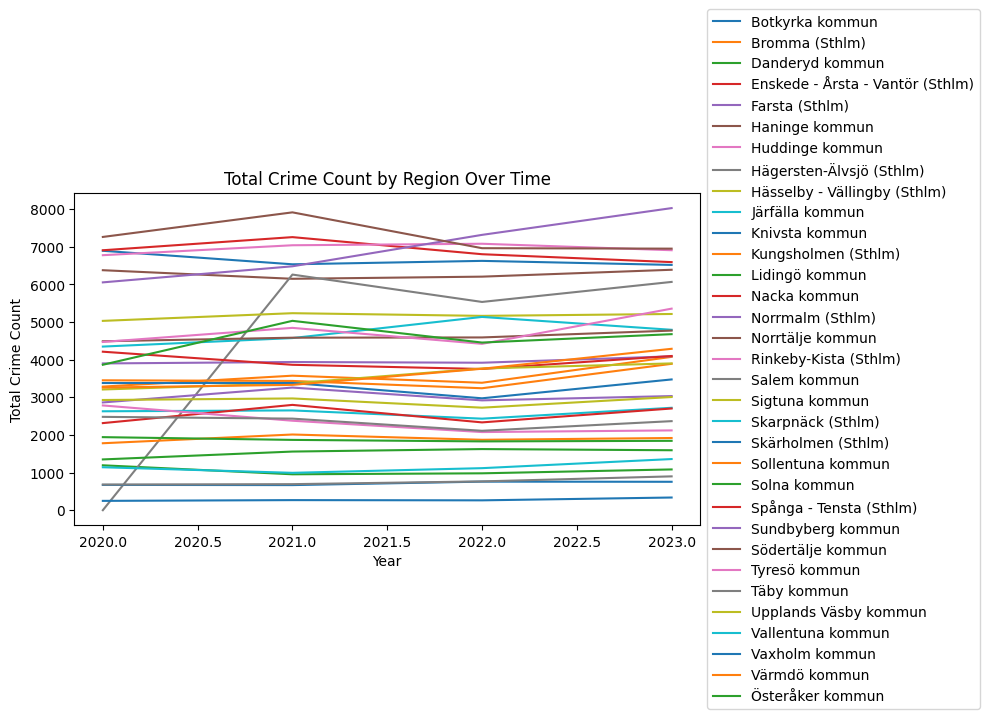

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'crime_data' is your entire dataset
# Assuming 'crime_data' is a pandas DataFrame containing columns 'Year', 'Month', 'Antal', 'Brott', and 'Region'

# Check unique regions in the dataset
unique_regions = data['Region'].unique()
#print("Unique Regions:", unique_regions)

# Group data by 'Region' and 'Year', summing the crime counts for each year
crime_counts = data.groupby(['Region', 'Year'])['Antal'].sum().reset_index()

# Print first few rows of crime_counts to inspect
#print(crime_counts.head())

# Plot data for all regions
plt.figure(figsize=(10, 6))
for region, region_data in crime_counts.groupby('Region'):
    plt.plot(region_data['Year'], region_data['Antal'], label=region)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Total Crime Count')
plt.title('Total Crime Count by Region Over Time')

# Add legend and position it in the upper left corner
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Show plot
plt.tight_layout()
plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder


# Need to encode Region and Crime to english and a number, because i have a lot ot the same values
label_encoder = LabelEncoder()
data['Region'] = label_encoder.fit_transform(data['Region']) + 1

# How many region do we have
print(data['Region'].unique())



[ 1  3  6  7 10 11 13 14 16 18 19 22 23  2  4  5  8  9 12 15 17 20 21 24
 25 26 27 28 29 30 31 32 33]


In [16]:
print(data['Crime'].unique())

['3-7 kap. Brott mot person' '3 kap. Brott mot liv och hälsa'
 'därav misshandel inkl. grov' '4 kap. Brott mot frihet och frid'
 '5 kap. Ärekränkningsbrott' '6 kap. Sexualbrott'
 '7 kap. Brott mot familj']


In [17]:
data['Crime'] = label_encoder.fit_transform(data['Crime']) + 1 
#data.drop(columns=['Brott'], axis=1, inplace=True)
# How many typ of crimes do we have
print(data['Crime'].unique())

[2 1 7 3 4 5 6]


In [18]:
data

,Region,Crime,Antal,Month,Year
0,1,2,241,Jan,2021
1,1,2,238,Feb,2021
2,1,2,196,Mar,2021
3,1,2,242,Apr,2021
4,1,2,254,May,2021
...,...,...,...,...,...
11083,33,6,0,Aug,2023
11084,33,6,0,Sep,2023
11085,33,6,0,Oct,2023
11086,33,6,0,Nov,2023


In [19]:
# Drop rows with NaN values resulting from shifting
data.dropna(inplace=True)
data

,Region,Crime,Antal,Month,Year
0,1,2,241,Jan,2021
1,1,2,238,Feb,2021
2,1,2,196,Mar,2021
3,1,2,242,Apr,2021
4,1,2,254,May,2021
...,...,...,...,...,...
11083,33,6,0,Aug,2023
11084,33,6,0,Sep,2023
11085,33,6,0,Oct,2023
11086,33,6,0,Nov,2023


In [ ]:
# Lets dump this data to a file

data.to_csv('../data/crimedata.csv', sep=",", index=False)
